# **Term Deposit Marketing**

**Background:**

This project is for a small startup focusing mainly on providing machine learning solutions in the European banking market. They work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

They are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, they are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal, they are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

**Data Description:**

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

**Attributes:**

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

## **Importing Python packages and data**

In [33]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
from matplotlib import cm
import matplotlib.ticker as mtick
import matplotlib.style as style
import seaborn as sns
import plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import scipy
from scipy.stats import loguniform, uniform, randint
from statistics import mean
import collections
from collections import Counter
from itertools import chain
import warnings
from google.colab import files
import time
import itertools
style.use('ggplot')
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import average_precision_score, make_scorer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
!pip install category_encoders
from category_encoders import TargetEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, NeighbourhoodCleaningRule, InstanceHardnessThreshold 
from imblearn.under_sampling import RepeatedEditedNearestNeighbours, CondensedNearestNeighbour, OneSidedSelection, NearMiss
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier
from imblearn.pipeline import Pipeline
from imblearn.metrics import geometric_mean_score
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
# necessary to read files into Colab
uploaded_files = files.upload()

Saving term-deposit-marketing-2020.csv to term-deposit-marketing-2020.csv


In [35]:
# Now, we can read the .csv file from desktop
df = pd.read_csv('term-deposit-marketing-2020.csv')

##**Exploratory Data Analysis**

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  y          45211 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [ ]:
df.isnull().values.any()

False

Great, looks like there are no missing values.

In [ ]:
df.describe()

,age,balance,day,duration,campaign
count,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76
std,10.62,3044.77,8.32,257.53,3.10
min,18.00,-8019.00,1.00,0.00,1.00
25%,33.00,72.00,8.00,103.00,1.00
50%,39.00,448.00,16.00,180.00,2.00
75%,48.00,1428.00,21.00,319.00,3.00
max,95.00,102127.00,31.00,4918.00,63.00


The balance variable is quite skewed and has a large variance as seen below. We will take a closer look at these distributions later. This data should be scaled before modeling unless gradient boosting is employed.

In [ ]:
df.var()

age            112.76
balance    9270598.95
day             69.26
duration     66320.57
campaign         9.60
dtype: float64

In [ ]:
print(df.groupby(['y']).size() / df.shape[0] * 100)

y
no    88.30
yes   11.70
dtype: float64


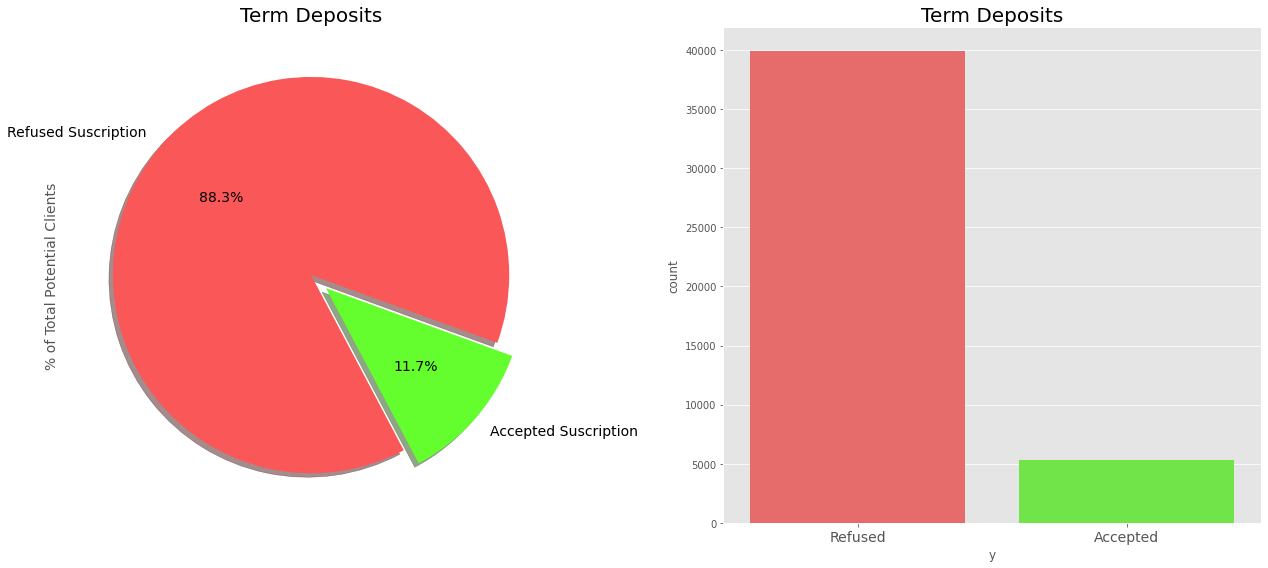

In [ ]:
colors = ["#FA5858", "#64FE2E"]
f, ax = plt.subplots(1,2,figsize=(18,8))

#colors=["#F08080", "#00FA9A"]
labels = 'Refused Suscription', 'Accepted Suscription'
df['y'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors, labels=labels, fontsize=14, startangle = -20)
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('% of Total Potential Clients', fontsize=14)
sns.countplot('y',data=df,ax=ax[1], palette=colors)
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['Refused', 'Accepted'], fontsize=14)
f.tight_layout()
plt.show()



We have a very unbalanced data set.  Only 11.7% of customers have subscribed to a term deposit in this data set.  We will have to make sure that we stratify this data before modeling and we use the appropriate methods for this.  This will ensure a test set of approximately the same percentage. Additionally, cost-sensitive or resampling methods must be employed as machine learning algorithms do not handle imbalanced datasets naturally.

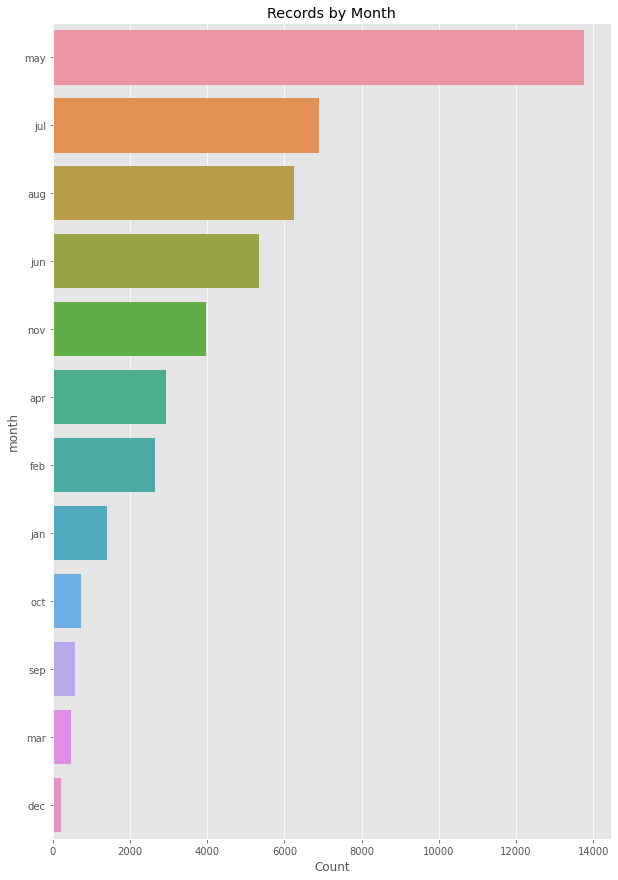

In [ ]:
plt.figure(figsize=(10,15))

sns.countplot(y = 'month', data = df, order=df.month.value_counts().index)
plt.title('Records by Month')
plt.xlabel('Count')

plt.show()

This distribution plot of the month field is not what I expected at all.  Very little observations in March, September, October and December.  Now, three of these months are at the end of a quarter but so is June, which has a substantial amount of observations.  I suspect that this would skew results and provide little insight, so we will drop this variable from the data set.  

In [36]:
df = df.drop(['month'], axis = 1)

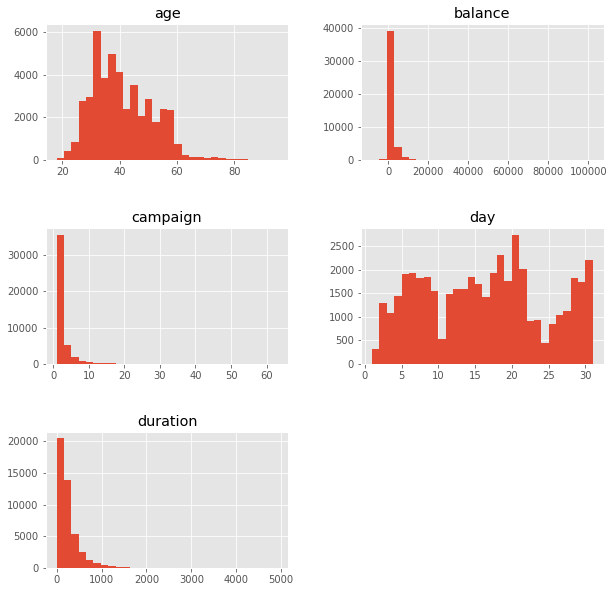

In [ ]:
df.hist(figsize=(10,10), bins = 30)
plt.subplots_adjust(hspace=0.5);

These distributions are interesting as balance, duration, pdays, previous and campaign are skewed to the right.  Day and age are interesting as age is almost symmetric centering around 35 years of age and day fluctuates throught the month. There is one thing that is peculiar about the day as we look at the values for it below.  There is no particular trend.  For instance, the 30th has the most conversions but the 31st has the least. Additionally, there are days in the middle of the month that have high conversion and days in the middle of the month that have low conversions.  This may be coincidental.

In [ ]:
dayTrend = df[df['y'] == 'yes']
dayTrend.day.value_counts()

30    271
12    244
13    241
15    238
4     230
18    228
5     215
14    210
8     201
21    201
16    192
20    192
2     182
6     181
11    181
9     179
3     178
17    176
7     157
22    154
27    150
28    143
25    133
29    129
23    126
19    122
10    121
26    116
1      90
24     62
31     46
Name: day, dtype: int64

The day variable should be dropped from this data set because there is no trend.

In [37]:
df = df.drop(['day'], axis = 1)

In [ ]:
print(df.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
duration     1573
campaign       48
y               2
dtype: int64


Unique values for variables help identify categorical, binary and continuous variables. The only variable that has high cardinality is the job variable but this makes sense. Below, we will check the distribution of seemingly categorical variables and check for unknown values.

In [ ]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [38]:
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

Admin. essentially means management so these two should be combined.

In [ ]:
suscribed_df = df.loc[df["y"] == "yes"]

occupations = df["job"].unique().tolist()


management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    #title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)


fig = go.Figure(data=traces, layout=layout)
fig.update_layout(title_text='Distribution of Ages by Occupation', title_x=0.5)
fig.update_xaxes(title_text='job')
fig.update_yaxes(title_text='age')
iplot(fig)

Here, we can see the distributions of the age of clients who were contacted and their occupations.  A rather even distribution for retired folks and blue-collar workers are considerably older. You would think these two would be opposite of what they are. Housemaids and the unemployed are quite young.

In [ ]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

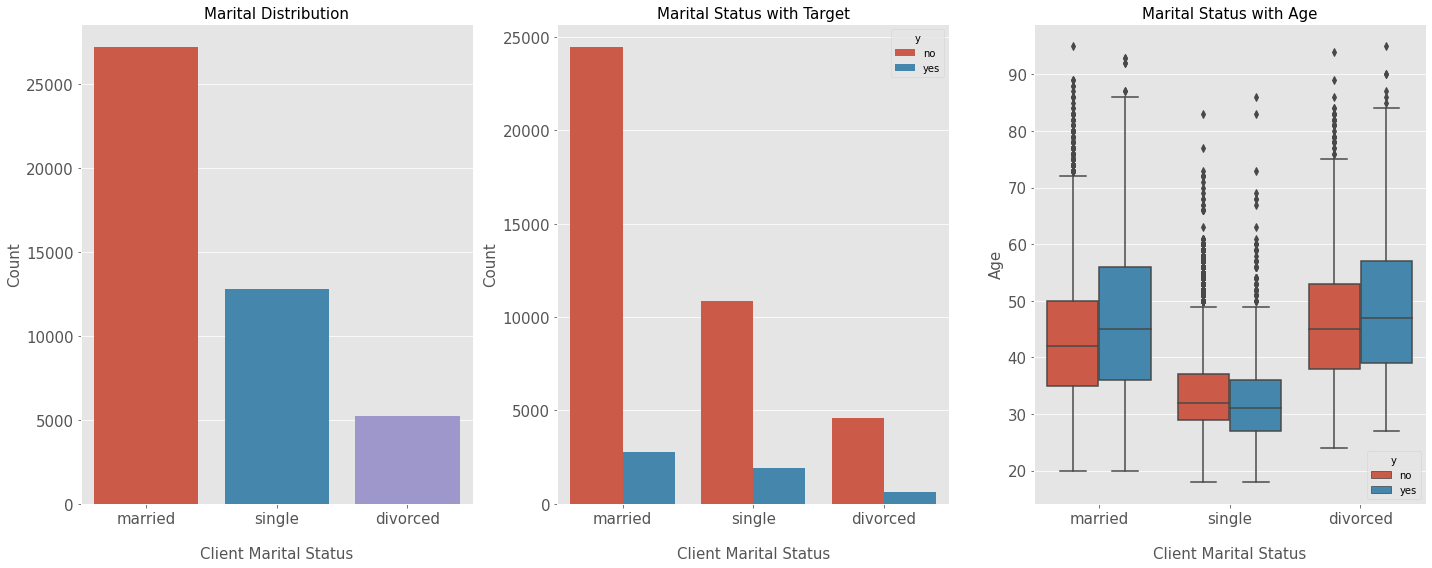

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))
fig.set_size_inches(20, 8)

sns.countplot(x = 'marital', data = df, ax = ax1)
ax1.set_xlabel('Client Marital Status', fontsize=15, labelpad=20)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Marital Distribution', fontsize=15)

ax1.tick_params(labelsize=15)

sns.countplot(x = 'marital', data = df, hue = 'y', ax = ax2)
ax2.set_xlabel('Client Marital Status', fontsize=15, labelpad=20)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Marital Status with Target', fontsize=15)

ax2.tick_params(labelsize=15)
#plt.legend(title='Subscribers', labels=['No', 'Yes'])

sns.boxplot(x='marital', y='age', hue='y', data=df, ax=ax3)
ax3.set_xlabel('Client Marital Status', fontsize=15, labelpad=20)
ax3.set_ylabel('Age', fontsize=15)
ax3.set_title('Marital Status with Age', fontsize=15)

ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 


More married couples in the dataset and the distributions for married couples and divorcees is almost identical.  Single clients are younger which you might expect.  There are a great deal of outliers here.

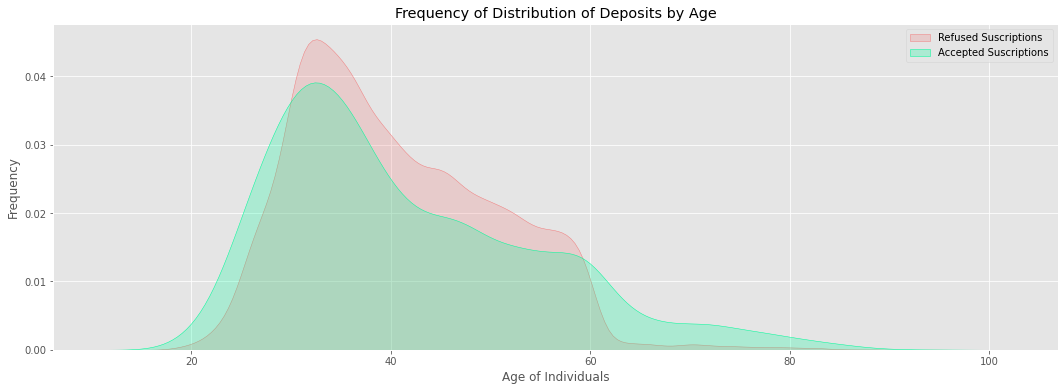

In [ ]:
fig = plt.figure(figsize=(18,6),)
ax=sns.kdeplot(df.loc[(df['y'] == 0),'age'] , color='#F08080',shade=True)
ax=sns.kdeplot(df.loc[(df['y'] == 1),'age'] , color='#00FA9A',shade=True )
ax.set(xlabel='Age of Individuals', ylabel='Frequency')
plt.title('Frequency of Distribution of Deposits by Age')
plt.legend(labels=["Refused Suscriptions","Accepted Suscriptions"])

The distribution is very similar here but more individuals over 60 years of age are accepting term deposits.  Younger clients are more prone to accepting term deposits as well up until about 30 years of age.

In [ ]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

We have a very small amount of 'unknown' values for job and education variables.  Comparatively, we can remove these unknowns if it is less than 5% of the data set, which is standard.

In [ ]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [39]:
#Removing 'unknown' values from the data set.
contacts = df[df['contact'] == 'unknown']

print(contacts.groupby(['y']).size() / contacts.shape[0] * 100)

y
no    95.93
yes    4.07
dtype: float64


The contact field is strange as we are only differentiating between cellular and hose phones and the number for house phones is small.  Moreover, there are over 13,000 unknown entries.  This variable should be deleted from the data set as I do not suspect that it will provide much insight and if it does, it calls for a new experiment and survey. 

In [40]:
df = df.drop(['contact'], axis = 1)

In [41]:
#Removing 'unknown' values from the data set.
df = df[df['education'] != 'unknown']

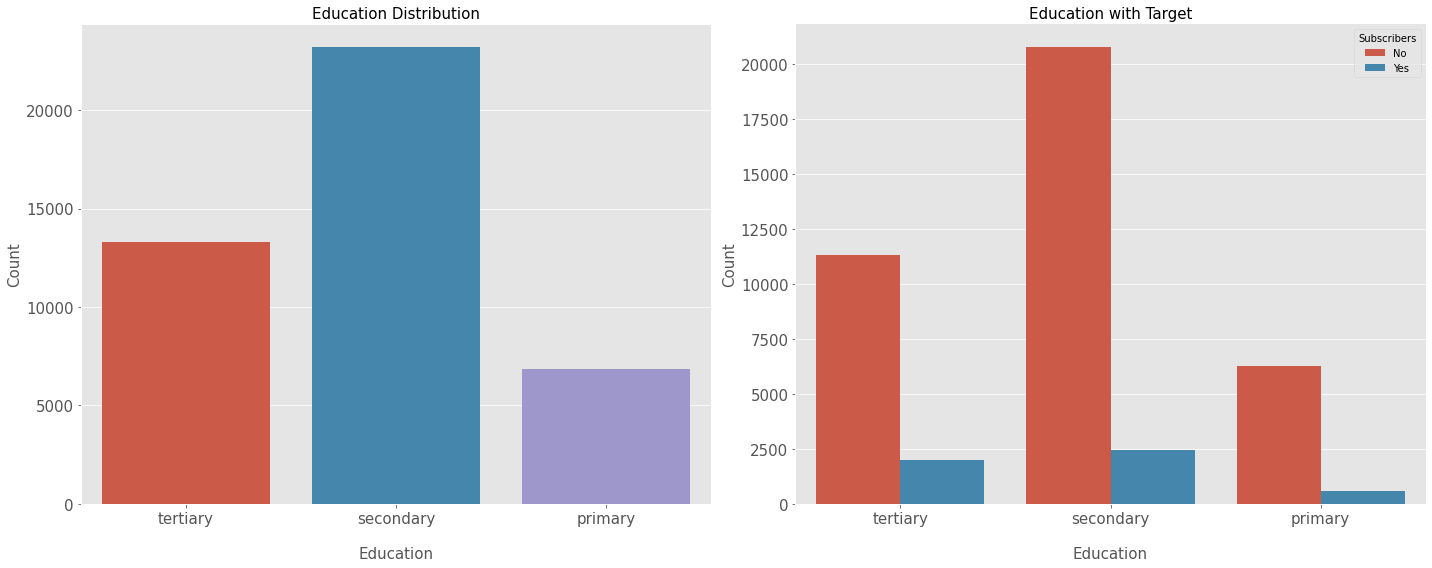

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'education', data = df, ax = ax1)
ax1.set_xlabel('Education', fontsize=15, labelpad=20)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Education Distribution', fontsize=15)

ax1.tick_params(labelsize=15)


sns.countplot(x = 'education', data = df, hue = 'y', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Education', fontsize=15, labelpad=20)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Education with Target', fontsize=15)

ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=['No', 'Yes'])

There are more clients with a secondary education but the number of clients with a tertiary education who subscribed to a term deposit is similar meaning the ratio is larger for those who have a tertiary education.

In [ ]:
df.job.value_counts()

management       14216
blue-collar       9278
technician        7355
services          4004
retired           2145
self-employed     1540
entrepreneur      1411
unemployed        1274
housemaid         1195
student            775
unknown            161
Name: job, dtype: int64

It looks like there are still some unknowns in the job variable as we did not catach all of them by removing unknowns from the education variable.  This means that we will remove 2018 rows from the data set of 45211 which is about 4.5%.  Because this is below 5%, this would be good practice and may help the predictive power of these features.

In [42]:
df = df[df['job'] != 'unknown']

In [ ]:
print(df.nunique())

age            75
job            10
marital         3
education       3
default         2
balance      6995
housing         2
loan            2
duration     1558
campaign       47
y               2
dtype: int64


We can now see the difference between continuous and categorical variables.

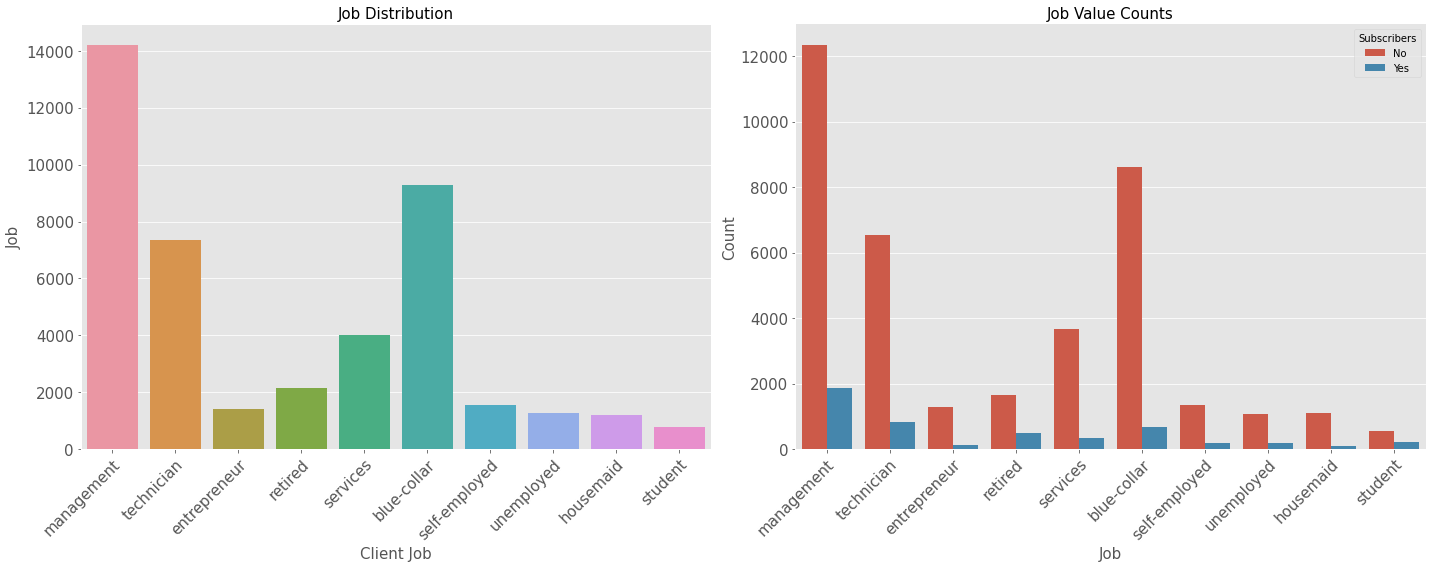

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'job', data = df, ax = ax1, )
ax1.set_xlabel('Client Job', fontsize=15)
ax1.set_ylabel('Job', fontsize=15)
ax1.set_title('Job Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
xlabels = ax1.get_xticklabels()

ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

sns.countplot(x = 'job', data = df, hue = 'y', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Job', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Job Value Counts', fontsize=15)
ax2.tick_params(labelsize=15)

ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=['No', 'Yes'])

Management has the most conversions but students and retirees have a higher ratio of conversion than other occupations.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  object
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  object
 7   loan       43193 non-null  object
 8   duration   43193 non-null  int64 
 9   campaign   43193 non-null  int64 
 10  y          43193 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.0+ MB


In [ ]:
print(df.groupby(['y']).size() / df.shape[0] * 100)

y
no    88.38
yes   11.62
dtype: float64


After removing unknown values and undesirable features, there is minimal change in the percentage of customer conversions.  Time to wrangle some data.

##**Data Wrangling**

We will now convert the binary variables to integers, namely the target y.

In [43]:
df['default'] = df['default'].replace({'no':0, 'yes':1})
df['housing'] = df['housing'].replace({'no':0, 'yes':1})
df['loan'] = df['loan'].replace({'no':0, 'yes':1})
df['y'] = df['y'].replace({'no':0, 'yes':1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  int64 
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  int64 
 7   loan       43193 non-null  int64 
 8   duration   43193 non-null  int64 
 9   campaign   43193 non-null  int64 
 10  y          43193 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


After converting binary variables to integers, there are only four variables that need converted for modeling purposes.  I will use the TargetEncoder here as there are now 11 values for the job feature and this encoder is very efficient.  Using One-Hot encoding or even feature hashing would create way too many features.  I will use One-Hot encoding for the marital and education features since there are only three values for those features.  The original features will be deleted, subsequently.

In [44]:
ce = TargetEncoder()
df['jobLabel'] = ce.fit_transform(df['job'], df['y'])

In [45]:
# One-Hot encoding with get_dummies
df = pd.get_dummies(df, columns = ['marital', 'education'])

In [ ]:
df.head()

,age,job,default,balance,housing,loan,duration,campaign,y,jobLabel,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,management,0,2143,1,0,261,1,0,0.13,0,1,0,0,0,1
1,44,technician,0,29,1,0,151,1,0,0.11,0,0,1,0,1,0
2,33,entrepreneur,0,2,1,1,76,1,0,0.08,0,1,0,0,1,0
5,35,management,0,231,1,0,139,1,0,0.13,0,1,0,0,0,1
6,28,management,0,447,1,1,217,1,0,0.13,0,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43193 non-null  int64  
 1   job                  43193 non-null  object 
 2   default              43193 non-null  int64  
 3   balance              43193 non-null  int64  
 4   housing              43193 non-null  int64  
 5   loan                 43193 non-null  int64  
 6   duration             43193 non-null  int64  
 7   campaign             43193 non-null  int64  
 8   y                    43193 non-null  int64  
 9   jobLabel             43193 non-null  float64
 10  marital_divorced     43193 non-null  uint8  
 11  marital_married      43193 non-null  uint8  
 12  marital_single       43193 non-null  uint8  
 13  education_primary    43193 non-null  uint8  
 14  education_secondary  43193 non-null  uint8  
 15  education_tertiary   43193 non-null 

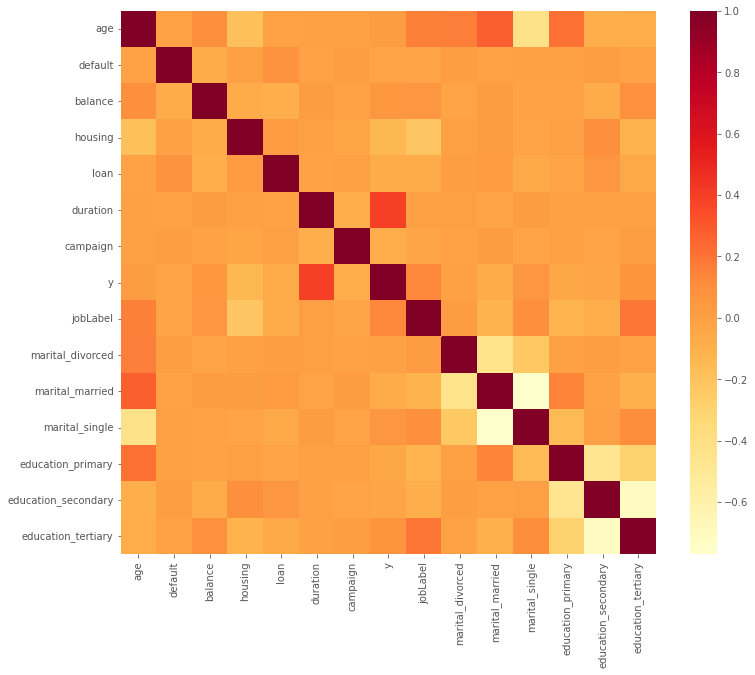

In [46]:
f, ax = plt.subplots(figsize=(12, 10))
corr = df.corr()
ax = sns.heatmap(corr, cmap = 'YlOrRd')
plt.show()

We would expect to see some correlation between age and marital status and job and education. But the correlations between these variables is still only slightly positive. The duration variable cannot be used for a few reasons.  First, it is somewhat highly correlated with the target, especially more so than the other variables.  Longer calls may be an indicator of a transaction being completed which introduces bias.  Customers may already be interested in purchasing a term deposit resulting in longer call duration. The duration variable should be dropped from the data set.  



In [47]:
df = df.drop(['duration'], axis = 1)

Now, we will define our target (y), drop the remaining object features, define X and scale the values to get ready for modeling.

In [48]:
y = df['y']

ddf = df.drop(['job'], axis = 1)

# move 'y' to the end
col_at_end = ['y']
basetable = ddf[[c for c in ddf if c not in col_at_end]
       + [c for c in col_at_end if c in ddf]]

df = df.drop(['job', 'y'], axis = 1)

In [49]:
columns = df.columns
columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'jobLabel',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary'],
      dtype='object')

These columns should match the following dataframe.

In [ ]:
df.head()

,age,default,balance,housing,loan,campaign,jobLabel,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,0,1,0.13,0,1,0,0,0,1
1,44,0,29,1,0,1,0.11,0,0,1,0,1,0
2,33,0,2,1,1,1,0.08,0,1,0,0,1,0
5,35,0,231,1,0,1,0.13,0,1,0,0,0,1
6,28,0,447,1,1,1,0.13,0,0,1,0,0,1


I want to change the name of some of the columns to be more readable.

In [50]:
df.columns = ['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'jobLabel', 'divorced', 'married', 'single', 'education_primary', 'education_secondary', 'education_tertiary']

In [51]:
df.head()

,age,default,balance,housing,loan,campaign,jobLabel,divorced,married,single,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,0,1,0.13,0,1,0,0,0,1
1,44,0,29,1,0,1,0.11,0,0,1,0,1,0
2,33,0,2,1,1,1,0.08,0,1,0,0,1,0
5,35,0,231,1,0,1,0.13,0,1,0,0,0,1
6,28,0,447,1,1,1,0.13,0,0,1,0,0,1


Now, we are ready for modeling.

##**Modeling**

In [ ]:
X = df

seed = 2346

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=seed)
print(X_train.shape[0] / X.shape[0])
print(X_test.shape[0] / X.shape[0])

0.74998263607529
0.25001736392471


Good, the training and test sets are in the percentages we want them.  I always like to check that.  We want to know what type of customers would be most likely to purchase a term deposit.  A decision tree is ideal in these cases as a visual diagram can tell us who is most likely to purchase.  We will put together a tree model for further EDA.

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 7, criterion = 'gini', class_weight='balanced')
modelT = clf.fit(X_train, y_train)
pred_y = modelT.predict(X_test)

test_precision = round(precision_score(y_test, pred_y), 4)
test_recall = round(recall_score(y_test, pred_y), 4)

print("Training accuracy: ", round(clf.score(X_train, y_train), 4))
print("Test accuracy: ", round(accuracy_score(y_test, pred_y), 4))
print('Test precision: {}, Test recall: {}'.format(test_precision, test_recall))

Training accuracy:  0.7049
Test accuracy:  0.695
Test precision: 0.2051, Test recall: 0.5649


That accuracy looks pretty good but this is only one tree, so the predictive power of the tree by itself is poor.  The precision and recall numbers are also very low.  We will need to either oversample or undersample the data in some way.  Let's optimize the tree to see what a good depth would be and see what kind of customers would be most likely to purchase a term deposit as a form of EDA.

In [ ]:
depth_list = list(range(2, 15))
depth_tuning = np.zeros((len(depth_list), 4))
depth_tuning[:,0] = depth_list
for index in range(len(depth_list)):
    clf = DecisionTreeClassifier(max_depth=depth_list[index], class_weight='balanced', criterion = 'gini')
    clf.fit(X_train, y_train)
    pred_y = clf.predict(X_test)
    depth_tuning[index,1] = accuracy_score(y_test, pred_y)
    depth_tuning[index,2] = precision_score(y_test, pred_y)
    depth_tuning[index,3] = recall_score(y_test, pred_y)
col_names = ['Max_Depth', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))

    Max_Depth  Accuracy  Precision  Recall
0        2.00      0.69       0.19    0.52
1        3.00      0.69       0.19    0.53
2        4.00      0.74       0.22    0.47
3        5.00      0.73       0.21    0.49
4        6.00      0.68       0.20    0.57
5        7.00      0.69       0.21    0.56
6        8.00      0.74       0.22    0.51
7        9.00      0.68       0.20    0.59
8       10.00      0.67       0.20    0.59
9       11.00      0.66       0.19    0.60
10      12.00      0.68       0.20    0.58
11      13.00      0.68       0.20    0.56
12      14.00      0.68       0.19    0.55


We can see that a depth of 3 would be best but the accuracy does not change much.  Let's try a tree depth of 3 for visual appeal. Next, we will determine which features the decision tree finds to be most influential and plot the tree.

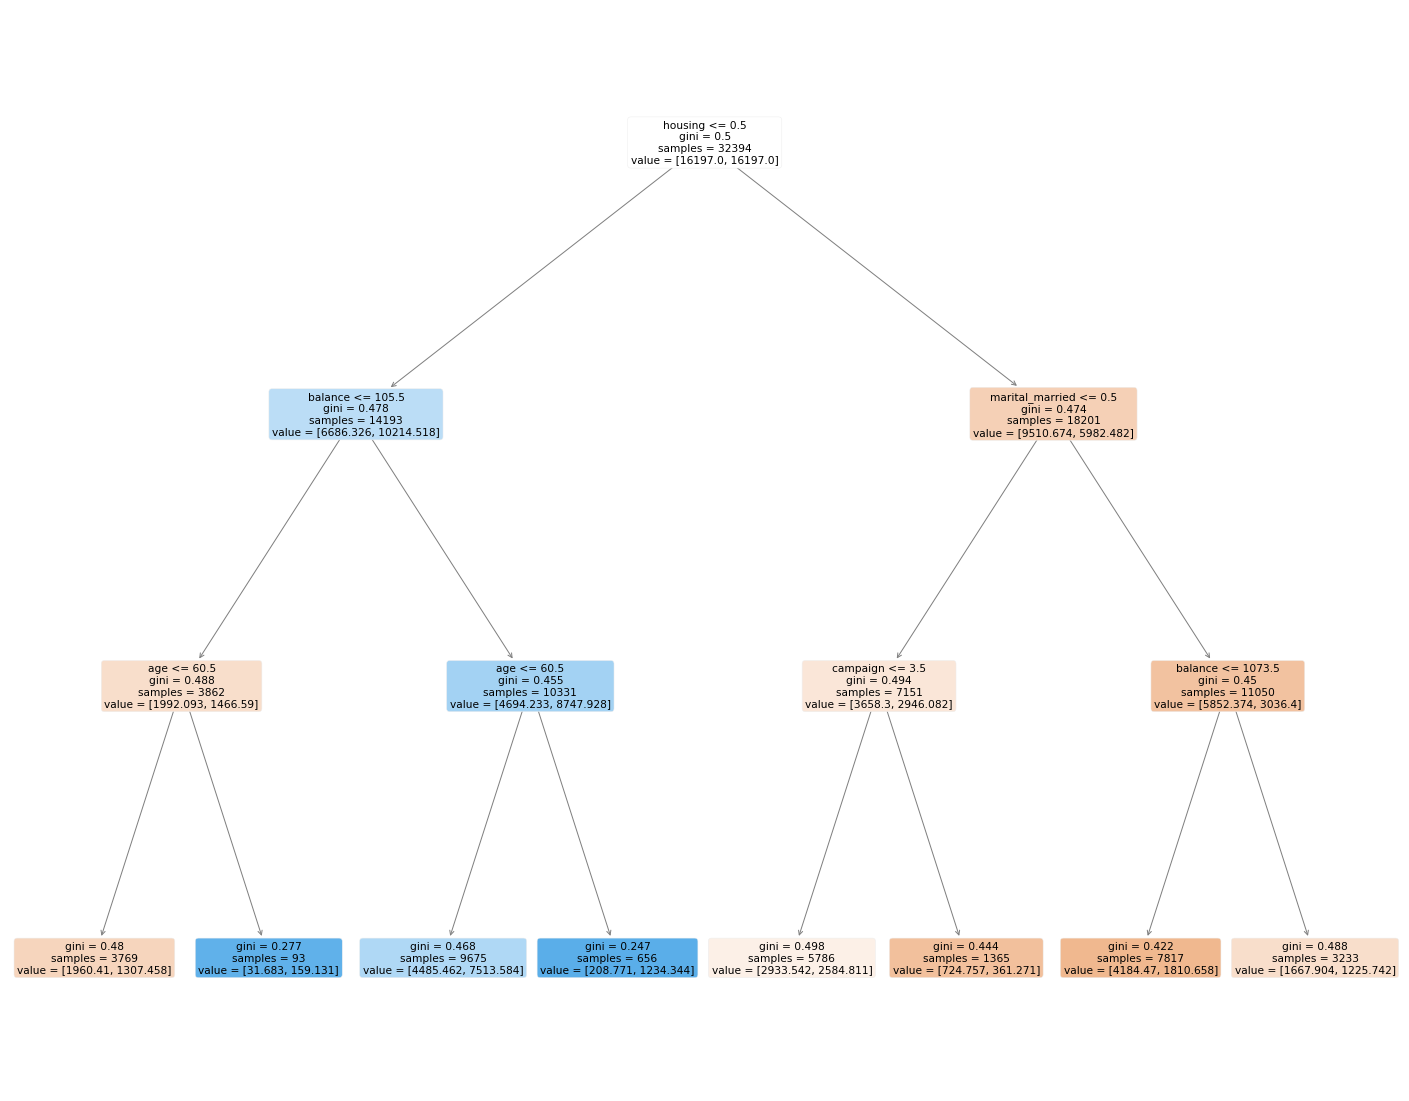

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'gini', class_weight='balanced')
modelT = clf.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
out = tree.plot_tree(clf, feature_names = columns, filled=True, rounded = True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('grey')
        arrow.set_linewidth(1)

According to this tree, customers who have a housing loan, married and have an average yearly balance of over $1074 were most likely to purchase a term deposit. Customers who are not married and were not contacted at least 4 times in this campaign probably would not purchase a term-deposit. As you can imagine, customers who have low average yearly balances were not likely to purchase and customers who are younger than 60 years of age in this group were also not likely to purchase.

Next, we should scale the data in case a linear model ends up producing the best model.  We will employ the Min Max Scaler which is good after one-hot encoding because those values will remain 0 and 1, respectively.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_train_scaled.shape

(32394, 13)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

,age,default,balance,housing,loan,campaign,jobLabel,divorced,married,single,education_primary,education_secondary,education_tertiary
count,32394.00,32394.00,32394.00,32394.00,32394.00,32394.00,32394.00,32394.00,32394.00,32394.00,32394.00,32394.00,32394.00
mean,0.30,0.02,0.09,0.56,0.16,0.03,0.20,0.12,0.60,0.28,0.16,0.53,0.31
std,0.14,0.13,0.03,0.50,0.37,0.05,0.19,0.32,0.49,0.45,0.36,0.50,0.46
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.18,0.00,0.07,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.27,0.00,0.08,1.00,0.00,0.02,0.18,0.00,1.00,0.00,0.00,1.00,0.00
75%,0.39,0.00,0.09,1.00,0.00,0.04,0.27,0.00,1.00,1.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_test_scaled_df.describe()

,age,default,balance,housing,loan,campaign,jobLabel,divorced,married,single,education_primary,education_secondary,education_tertiary
count,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00
mean,0.30,0.02,0.09,0.56,0.17,0.03,0.20,0.12,0.60,0.28,0.16,0.54,0.30
std,0.14,0.14,0.03,0.50,0.37,0.05,0.20,0.32,0.49,0.45,0.37,0.50,0.46
min,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.00,0.07,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.27,0.00,0.08,1.00,0.00,0.02,0.18,0.00,1.00,0.00,0.00,1.00,0.00
75%,0.39,0.00,0.09,1.00,0.00,0.04,0.27,0.00,1.00,1.00,0.00,1.00,1.00
max,1.00,1.00,0.81,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
X_train = X_train_scaled_df
X_test = X_test_scaled_df

Let's see if the Lazy Classifier can help us decide on a machine learning function to use.

In [ ]:
lazy = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazy.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [03:48<00:00,  7.89s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.65,0.63,0.63,0.71,0.29
DecisionTreeClassifier,0.82,0.59,0.59,0.82,0.23
GaussianNB,0.82,0.59,0.59,0.83,0.06
RandomForestClassifier,0.88,0.57,0.57,0.85,3.65
BaggingClassifier,0.88,0.57,0.57,0.85,1.06
ExtraTreeClassifier,0.82,0.57,0.57,0.82,0.08
ExtraTreesClassifier,0.86,0.57,0.57,0.84,3.10
PassiveAggressiveClassifier,0.75,0.57,0.57,0.78,0.28
QuadraticDiscriminantAnalysis,0.83,0.55,0.55,0.82,0.49


Now, we should conceptually think about what machine learning algorithm to use.  The Balanced Random Forest may be a choice here as it is tuneable, a good selection for the number of observations under 50,000 and it is good with a large number of features since we have not explored feature elimination yet. It is also good with an unbalanced data set which is certainly what we have here. The ExtraTrees Classifier may also be a good choice but its computation time is a bit longer than XGBoost or AdaBoost. Nearest Centroid and Gaussian Naive-Bayes models do not have a great deal of hyperparameters and the Decision Tree, which is what we tried earlier, does not have good predictive power as well as being extremely sensitive to changes in the data. Below is my function for hyperparameter tuning that uses randomized search stratified k-fold cross-validation. I will create a scoring method using the geometric mean as this metric seeks to balance sensitivity and specificity when optimized.



$$ geometric\ mean = {\sqrt{Sensitivity\ X\ Specificity} } $$



**Sensitivity:** The ability of a model to predict the true positives of each class.

**Specificity:** The ability of a model to predict the true negatives of each class.

In [ ]:
def hyperparameter_tune(base_model, parameters, n_iter, k, X = X_train, y = y_train):
    start_time = time.time()


    gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')

    cv_method = StratifiedKFold(n_splits=k,  random_state=seed)
    
    
    
    optimal_model = RandomizedSearchCV(base_model,
                            param_distributions=parameters,
                            n_iter=n_iter,
                            cv=cv_method,
                            n_jobs=-1,
                            scoring = gm_scorer,
                            verbose = 1,
                            random_state=seed)
    
    optimal_model.fit(X_train, y_train)
    
    stop_time = time.time()

    #scores = cross_val_score(optimal_model, X, y, cv=cv_method, scoring=gm_scorer, verbose = 1, n_jobs = -1)
    
    print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print("====================")
    #print("Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}".format(scores.mean(), scores.std()))
    print("Best Score: {:.3f}".format(optimal_model.best_score_))
    print("Best Parameters: {}".format(optimal_model.best_params_))
    
    return optimal_model.best_params_, optimal_model.best_score_

Now, we will define relevant hyperparameters for a host of ensemble methods.

In [ ]:
parameters = {
        
                 'n_estimators': np.arange(100,500),
                 'criterion': ["gini", "entropy"],
                 'max_depth': np.arange(3,20),
                 'min_samples_leaf': randint(1, 9),
                 'min_samples_split': randint(2, 9),
                 'max_features': randint(1, 9)
}

###**Cost-Sensitive learning**





The goal of cost-sensitive learning is to minimize the "cost" or the penalty associated with incorrect prediction on the training set. We will start with a "weighted" random forest.  When the class weight is set to "balanced", inverted weights are applied to the minority class placing a higher penalty on the training set if the minority class is misclassified. Here, we will use the best hyperparameter values after 60 iterations which should put us inside of a 95% confidence interval that we have the best model and to put those hyperparameters into our model subsequently.

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state = seed)  

best_params, best_score = hyperparameter_tune(rf, parameters, 60, 10, X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.4min finished


Elapsed Time: 00:04:31
Best Score: 0.647
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 278}


In [ ]:
rf_tuned = RandomForestClassifier(class_weight='balanced', criterion= 'gini', max_depth = 10, max_features = 1, min_samples_leaf = 8, min_samples_split = 4, n_estimators = 278)
rf_tuned.fit(X_train, y_train)

print(rf_tuned.score(X_train, y_train))
print(rf_tuned.score(X_test, y_test))

0.7450762486880287
0.7320122233540143


The accuracy and geometric mean score look pretty good. Random Forests do not generally overfit on most training sets.  Let's take a look at the confusion matrix and metrics after the tuned model.

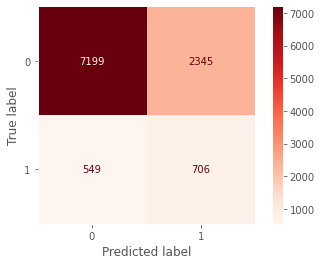

Accuracy of the Cost-Sensitive Random Forest: 73.20122233540143 

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      9544
           1       0.23      0.56      0.33      1255

    accuracy                           0.73     10799
   macro avg       0.58      0.66      0.58     10799
weighted avg       0.85      0.73      0.77     10799



In [ ]:
rf_predicted = rf_tuned.predict(X_test)

plot_confusion_matrix(rf_tuned, X_test, y_test, cmap = 'Reds')
plt.grid(False)
plt.show()

rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Accuracy of the Cost-Sensitive Random Forest:", rf_acc_score * 100,'\n')
print(classification_report(y_test, rf_predicted))

The accuracy numbers are good but the precision and recall metrics for the minority class are low.  Let's take a look at an ExtraTrees Classifier.  This algorithm fits a number of randomized decision trees (extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  We will then implement a "balanced subsample" for the weight which changes the class weight with each bootstrap sample as opposed to the entire training set.  

In [ ]:
xtra = ExtraTreesClassifier(class_weight='balanced_subsample', random_state = seed)

best_params, best_score = hyperparameter_tune(xtra, parameters, 60, 10, X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.3min finished


Elapsed Time: 00:02:22
Best Score: 0.643
Best Parameters: {'criterion': 'gini', 'max_depth': 17, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 466}


In [ ]:
xtra_tuned = ExtraTreesClassifier(class_weight='balanced_subsample', criterion= 'gini', max_depth = 17, max_features = 2, min_samples_leaf = 3, min_samples_split = 7, n_estimators = 466)
xtra_tuned.fit(X_train, y_train)
print(xtra_tuned.score(X_train, y_train))
print(xtra_tuned.score(X_test, y_test))

0.7132184972525777
0.6933975368089638


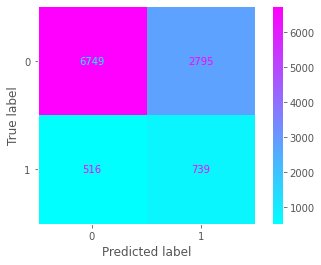

Accuracy of the Extra Trees Classifier: 69.33975368089638 

              precision    recall  f1-score   support

           0       0.93      0.71      0.80      9544
           1       0.21      0.59      0.31      1255

    accuracy                           0.69     10799
   macro avg       0.57      0.65      0.56     10799
weighted avg       0.85      0.69      0.75     10799



In [ ]:
xtra_predicted = xtra_tuned.predict(X_test)

plot_confusion_matrix(xtra_tuned, X_test, y_test, cmap = 'cool')
plt.grid(False)
plt.show()

xtra_acc_score = accuracy_score(y_test, xtra_predicted)

print("Accuracy of the Extra Trees Classifier:", xtra_acc_score * 100,'\n')
print(classification_report(y_test, xtra_predicted))

Next, we will fit our Balanced Random Forest Classifier on the training set. This is a useful modification to random forest because it randomly under-samples each boostrap sample to balance it.

In [ ]:
brf = BalancedRandomForestClassifier(class_weight={0:1, 1:7.5})

best_params, best_score = hyperparameter_tune(brf, parameters, 60, 10, X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.5min finished


Elapsed Time: 00:02:36
Best Score: 0.598
Best Parameters: {'criterion': 'gini', 'max_depth': 18, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 405}


In [ ]:
brf_tuned = BalancedRandomForestClassifier(class_weight={0:1, 1:7.5}, criterion= 'gini', max_depth = 18, max_features = 2, min_samples_leaf = 1, min_samples_split = 3, n_estimators = 405)
brf_tuned.fit(X_train,y_train)
print(brf_tuned.score(X_train,y_train))
print(brf_tuned.score(X_test,y_test))

0.5492066432055319
0.49430502824335587


This is a lower f1 score than we wanted so maybe the Balanced Random Forest model is lowering the error so much that we cannot predict accurately on the majority class.

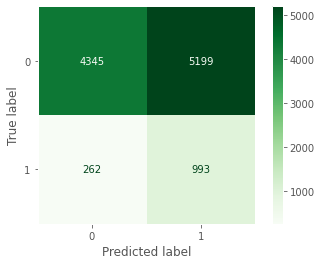

Accuracy of the Balanced Random Forest: 49.43050282433559 

              precision    recall  f1-score   support

           0       0.94      0.46      0.61      9544
           1       0.16      0.79      0.27      1255

    accuracy                           0.49     10799
   macro avg       0.55      0.62      0.44     10799
weighted avg       0.85      0.49      0.57     10799



In [ ]:
brf_predicted = brf_tuned.predict(X_test)

plot_confusion_matrix(brf_tuned, X_test, y_test, cmap = 'Greens')
plt.grid(False)
plt.show()

brf_acc_score = accuracy_score(y_test, brf_predicted)

print("Accuracy of the Balanced Random Forest:", brf_acc_score * 100,'\n')
print(classification_report(y_test, brf_predicted))

The recall score here is not too bad as we are trying to predict which customers are most likely to purchase a term deposit.  Still, there were a lot of customers who would not buy that were misclassified for some reason.  Let's see if an Easy Ensemble Classifier can perform better. The Easy Ensemble involves creating balanced samples of the training data set by selecting all examples from the minority class and a subset of the majority class. Rather than using pruned decision trees, boosted decision trees are used on each subset, then determining the errors made by the tree and weighing the examples in the data set by those errors so that more attention is paid to the misclassified examples and less to the correctly classified examples.  A subsequent tree is then fit on the weighted data set intended to correct the errors.  An optimization must be performed for the number of decision trees to use.

In [ ]:
easy_model = EasyEnsembleClassifier(random_state = seed)

easy_params = {'n_estimators': np.arange(100,500)}

best_params, best_score = hyperparameter_tune(easy_model, easy_params, 60, 10, X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 41.2min finished


Elapsed Time: 00:43:03
Best Score: 0.646
Best Parameters: {'n_estimators': 368}


In [ ]:
easy_tuned =  EasyEnsembleClassifier(n_estimators = 132, random_state = seed)
easy_tuned.fit(X_train, y_train)
print(easy_tuned.score(X_train, y_train))
print(easy_tuned.score(X_test, y_test))

0.6638883743903192
0.6645059727752569


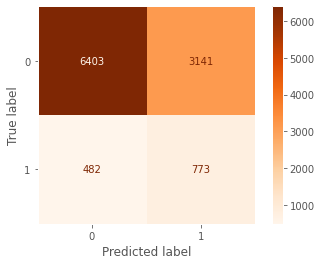

Accuracy of the Easy Ensemble Classifier: 66.45059727752569 

              precision    recall  f1-score   support

           0       0.93      0.67      0.78      9544
           1       0.20      0.62      0.30      1255

    accuracy                           0.66     10799
   macro avg       0.56      0.64      0.54     10799
weighted avg       0.84      0.66      0.72     10799



In [ ]:
easy_predicted = easy_tuned.predict(X_test)

plot_confusion_matrix(easy_tuned, X_test, y_test, cmap = 'Oranges')
plt.grid(False)
plt.show()

easy_acc_score = accuracy_score(y_test, easy_predicted)

print("Accuracy of the Easy Ensemble Classifier:", easy_acc_score * 100,'\n')
print(classification_report(y_test, easy_predicted))

It looks like most of the predicted results have a strong bias for the majority class.  Maybe a different type of tree model or approach would be beneficial. Random Forests do not always do well with one-hot encoding. K-Fold Cross Validation is not suitable for handling imbalanced data because it randomly divides the data into k-folds. Folds might likely have negligible or no data from the minority class resulting in a highly biased model. We can use a stratified k-fold ensuring splitting the data randomly and keeping the same imbalanced class distribution for each subset. SMOTE (Synthetic Minority Oversampling Technique) is one of the oversampling techniques that use a minority class to generate synthetic samples.  SMOTE works by generating instances that are close in feature space, using interpolation between positive cases that are close to each other. It randomly selects a minority class instance and finds its nearest neighbor. Then it creates synthetic models by randomly choosing one of the neighbours and forms a line segment in the feature space. It then generates synthetic instances of the two selected instances as convex combinations. 

In [ ]:
#Use SMOTE to oversample the minority class
resample = SMOTE(random_state=seed)
over_X, over_y = resample.fit_resample(X_train, y_train)

#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(random_state=seed)

In [ ]:
best_params, best_score = hyperparameter_tune(SMOTE_SRF, parameters, 60, 10, over_X, over_y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.7min finished


Elapsed Time: 00:03:51
Best Score: 0.288
Best Parameters: {'criterion': 'gini', 'max_depth': 18, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 405}


In [ ]:
#Create Stratified K-fold cross validation
cv = StratifiedKFold(n_splits=10, random_state=seed)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.882
Mean recall: 0.876
Mean precision: 0.897


As you can see, even high precision and recall scores do not mean that we have a good model as we take a look at the confusion matrix.

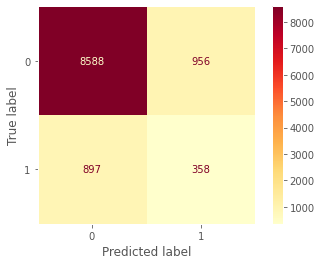

Accuracy of the SMOTE Balanced Random Forest: 82.84100379664784 

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      9544
           1       0.27      0.29      0.28      1255

    accuracy                           0.83     10799
   macro avg       0.59      0.59      0.59     10799
weighted avg       0.83      0.83      0.83     10799



In [ ]:
SMOTE_SRF.fit(over_X, over_y)

#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)

plot_confusion_matrix(SMOTE_SRF, X_test, y_test, cmap = 'YlOrRd')
plt.grid(False)
plt.show()

SMOTE_acc_score = accuracy_score(y_test, y_pred)

print("Accuracy of the SMOTE Balanced Random Forest:", SMOTE_acc_score*100,'\n')
print(classification_report(y_test, y_pred))

This result is very favorable toward the majority class as the model is not predicting the customers who are actually purchasing term deposits well. We may have to employ random oversampling which out performs undersampling and turn to XGBoost to control for overfitting.  Overfitting is the main drawback of oversampling as well as increased computation time.  Max depth, gamma, the learning rate, subsample and the max delta step are all parameters that can help control overfitting.  We will now define our hyperparmeter grid for XGBoost.

In [ ]:
param_grid_xgb = {
                 'max_depth': np.arange(2, 20),
                 'n_estimators': np.arange(100,500),
                 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
                 'subsample': np.arange(0.5, 1.0),
                 'colsample_bytree': np.arange(0.4, 1.0),
                 'colsample_bylevel': np.arange(0.4, 1.0),
                 'min_child_weight': np.arange(1, 10),
                 'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0] 
}

In [ ]:
xgb_clf = xgb.XGBClassifier(objective = 'binary:logistic', scale_pos_weight = 7.5, verbose = 1, seed=seed)

gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')

cv = StratifiedKFold(n_splits=10, random_state=1)
# define randomized search cross validation to be used with a more balanced data set.
rcv = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_grid_xgb, n_jobs=-1, cv=cv, scoring = gm_scorer)

result = rcv.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (result.best_score_, result.best_params_))
# report all configurations
print(result.cv_results_['mean_test_score'])
print(result.cv_results_['std_test_score'])



[00:07:19] WARNING: /workspace/src/learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best: 0.647301 using {'subsample': 0.5, 'reg_lambda': 5.0, 'n_estimators': 344, 'min_child_weight': 6, 'max_depth': 18, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.4}
[0.60795225 0.64240499 0.61843079 0.64206245 0.01803787 0.643205
 0.64307732 0.64270892 0.64730112 0.64370972]
[0.01272336 0.01458595 0.01908249 0.01342867 0.02232341 0.01293065
 0.01222126 0.01261706 0.01430939 0.0122783 ]


Still not a very good score. Let's employ random oversampling on the data set and see if that helps the results using XGBoost again this time using the max delta step to help with convergence.

In [ ]:
ros = RandomOverSampler(random_state=seed)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 28628, 1: 3766})
Resample dataset shape Counter({0: 28628, 1: 28628})


The size of the data set has dramatically increased but now have a balanced target.  

In [ ]:
xgb_ros = xgb.XGBClassifier(objective = 'binary:logistic', max_delta_step = 10, gamma = 0.5, subsample= 0.5, reg_lambda = 50, n_estimators = 425, 
                            min_child_weight = 4, max_depth = 19, learning_rate = 0.2, colsample_bytree = 0.4, colsample_bylevel =0.4)

In [ ]:
best_params, best_score = hyperparameter_tune(xgb_ros, param_grid_xgb, 60, 10, X_ros, y_ros)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.3min finished


Elapsed Time: 00:01:22
Best Score: 0.275
Best Parameters: {'subsample': 0.5, 'reg_lambda': 1.0, 'n_estimators': 431, 'min_child_weight': 6, 'max_depth': 12, 'learning_rate': 0.2, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.4}


Not the best geometric mean score.  We will use XGBoost with the best parameters found by my hyperparameter tune function.

In [ ]:
xgb_ros_tuned = xgb.XGBClassifier(objective = 'binary:logistic', max_delta_step = 10, gamma = 0.5, subsample = 0.5, reg_lambda = 1, n_estimators = 431, min_child_weight = 6, max_depth = 12, 
                                  learning_rate = 0.2, colsample_bytree = 0.4, colsample_bylevel = 0.4)
xgb_ros_tuned.fit(X_ros, y_ros)
print(xgb_ros_tuned.score(X_ros, y_ros))
print(xgb_ros_tuned.score(X_test, y_test))

0.867751851334358
0.7595147698861006


This looks good but there may be some overfitting going on.  Let's check to see if precision and recall are good.  

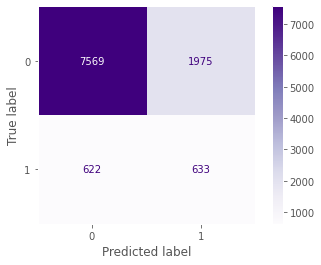

Accuracy of the XGBoost model: 75.95147698861005 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      9544
           1       0.24      0.50      0.33      1255

    accuracy                           0.76     10799
   macro avg       0.58      0.65      0.59     10799
weighted avg       0.84      0.76      0.79     10799



In [ ]:
xgb_ros_tuned_predicted = xgb_ros_tuned.predict(X_test)

plot_confusion_matrix(xgb_ros_tuned, X_test, y_test, cmap = 'Purples')
plt.grid(False)
plt.show()

xgb_acc_score = accuracy_score(y_test, xgb_ros_tuned_predicted)

print("Accuracy of the XGBoost model:", xgb_acc_score * 100,'\n')
print(classification_report(y_test, xgb_ros_tuned_predicted))

An improvement, but this is not quite what we are looking for.  The f1 score is still very low.  Let's take a look at feature importances.

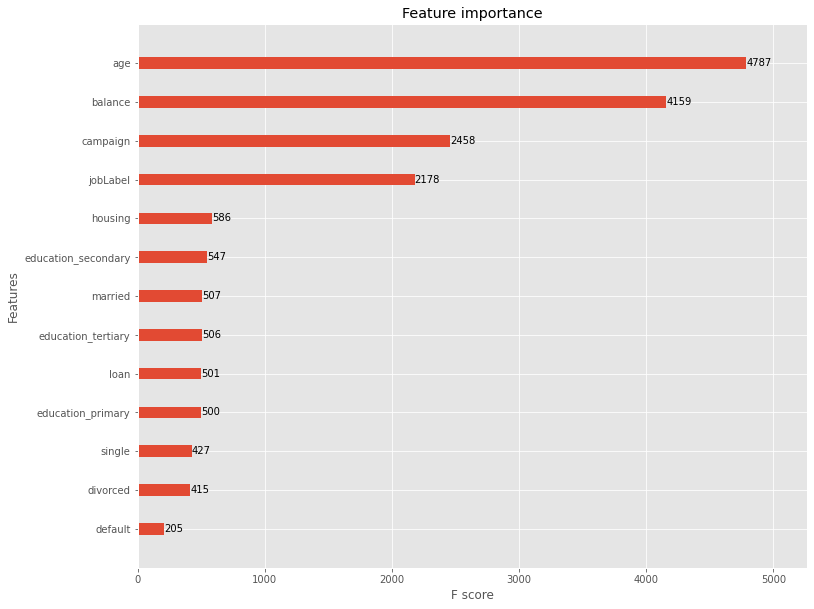

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))
xgb.plot_importance(xgb_ros_tuned, height=0.3, ax=ax)
plt.show()

Age and balance look to be the most important features with type of job and number of contacts in the current campaign also proving to be somewhat important.

In [ ]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=3, random_state=seed).fit_transform(X_train)
t1 = time.time()
print("T-SNE took {:.4} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=3, random_state=seed).fit_transform(X_train)
t1 = time.time()
print("PCA took {:.4} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=3, algorithm='randomized', random_state=seed).fit_transform(X_train)
t1 = time.time()
print("Truncated SVD took {:.4} s".format(t1 - t0))

T-SNE took 157.0 s
PCA took 0.2235 s
Truncated SVD took 0.2764 s


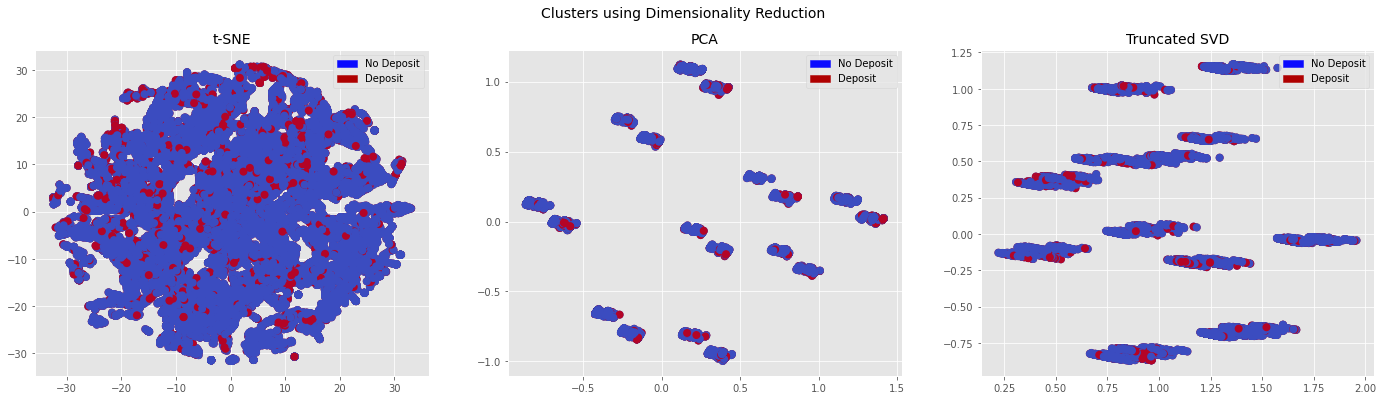

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Deposit', 'Deposit']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Deposit')
red_patch = mpatches.Patch(color='#AF0000', label='Deposit')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 0), cmap='coolwarm', label='No Deposit', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 1), cmap='coolwarm', label='Deposit', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 0), cmap='coolwarm', label='No Deposit', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 1), cmap='coolwarm', label='Deposit', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_train == 0), cmap='coolwarm', label='No Deposit', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_train == 1), cmap='coolwarm', label='Deposit', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Dimensionality reduction did not improve our metrics much. There are many types of oversampling and undersampling techiniques with a few combination techniques as well. But which one should we choose.  Developing a few functions would help us assess every method on the same training set for a selected machine learning algorithm as shown below. 

In [52]:
X = df

seed = 2346

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

ez = []
for fold, (tr, te) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]

    #svd = TruncatedSVD(n_components=3, algorithm='randomized', random_state=seed)
    #svd.fit(X_train)
    #X_train_de = svd.transform(X_train)
    #X_test_de = svd.transform(X_test)

    #model = LogisticRegression(penalty='l2', solver='liblinear', random_state=seed)
    #model = RandomForestClassifier(verbose = 1, n_jobs=-1)
    model = EasyEnsembleClassifier(n_jobs=-1)
    
    model.fit(X_train, y_train)
    y_pr = model.predict_proba(X_test)[:,1]

    auc = roc_auc_score(y_test, y_pr)
    aps = average_precision_score(y_test, y_pr)

    ez.append({'auc': auc, 'aps': aps})

ez = pd.DataFrame(ez)

In [ ]:
ez[['auc', 'aps']].agg(['mean', 'std'])

,auc,aps
mean,0.72,0.30
std,0.01,0.01


In [ ]:
def get_oversampler(sampler):
    if 'adasyn' == sampler:
        p = {
            'random_state': 37,
            'n_neighbors': 5
        }
        return ADASYN(**p)
    elif 'borderlinesmote' == sampler:
        p = {
            'random_state': 37,
            'n_jobs': -1,
            'k_neighbors': 5,
            'm_neighbors': 10
        }
        return BorderlineSMOTE(**p)
    elif 'svmsmote' == sampler:
        p = {
            'random_state': 37,
            'n_jobs': -1,
            'k_neighbors': 5,
            'm_neighbors': 10
        }
        return SVMSMOTE(**p)
    elif 'kmeanssmote' == sampler:
        kmeans = KMeans(n_clusters=5, random_state=37)
        p = {
            'random_state': 37,
            'n_jobs': -1,
            'k_neighbors': 5,
            'kmeans_estimator': kmeans
        }
        return KMeansSMOTE(**p)
    elif 'random' == sampler:
        p = {
            'random_state': 37
        }
        return RandomOverSampler(**p)
    else:
        p = {
            'random_state': 37,
            'k_neighbors': 5
        }
        return SMOTE(**p)

def get_results(sampler, f):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=37)

    results = []
    for fold, (tr, te) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[tr], X.iloc[te]
        y_train, y_test = y.iloc[tr], y.iloc[te]

        counts = sorted(Counter(y_train).items())
        n_0, n_1 = counts[0][1], counts[1][1]

        if sampler != 'none':
            sampling_approach = f(sampler)
            X_train, y_train = sampling_approach.fit_resample(X_train, y_train)

        #model = LogisticRegression(penalty='l2', solver='liblinear', random_state=37)
        model = EasyEnsembleClassifier(n_estimators = 132)
        
        model.fit(X_train, y_train)
        y_pr = model.predict_proba(X_test)[:,1]

        auc = roc_auc_score(y_test, y_pr)
        aps = average_precision_score(y_test, y_pr)

        counts = sorted(Counter(y_train).items())
        r_0, r_1 = counts[0][1], counts[1][1]

        results.append({
            'sampler': sampler,
            'auc': auc,
            'aps': aps,
            'n_maj': n_0,
            'r_maj': r_0,
            'n_min': n_1,
            'r_min': r_1
        })

    return results

In [ ]:
%%time

samplers = ['none', 'random', 'smote', 'adasyn', 'borderlinesmote', 'svmsmote']
odf = pd.DataFrame(list(chain(*[get_results(s, get_oversampler) for s in samplers])))

CPU times: user 4h 42min 56s, sys: 3min, total: 4h 45min 56s
Wall time: 4h 44min 7s


In [ ]:
odf[['sampler', 'auc', 'aps']].groupby('sampler').agg(['mean', 'std'])

auc       aps     
                mean  std mean  std
sampler                            
adasyn          0.71 0.01 0.29 0.02
borderlinesmote 0.71 0.01 0.29 0.02
none            0.72 0.01 0.30 0.02
random          0.72 0.01 0.30 0.02
smote           0.71 0.01 0.29 0.02
svmsmote        0.71 0.01 0.30 0.02

It looks like random oversampling or no sampling is more advantageous than the various varieties of SMOTE here. Let's take a look at undersampling.

In [ ]:
def get_undersampler(sampler):
    if 'random' == sampler:
        p = {
            'random_state': 37
        }
        return RandomUnderSampler(**p)
    elif 'nearmiss1' == sampler:
        p = {
            'version': 1,
            'n_jobs': -1
        }
        return NearMiss(**p)
    elif 'nearmiss2' == sampler:
        p = {
            'version': 2,
            'n_jobs': -1
        }
        return NearMiss(**p)
    elif 'nearmiss3' == sampler:
        p = {
            'version': 3,
            'n_jobs': -1
        }
        return NearMiss(**p)
    elif 'editednn' == sampler:
        p = {
            'n_jobs': -1
        }
        return EditedNearestNeighbours(**p)
    elif 'reditednn' == sampler:
        p = {
            'n_jobs': -1
        }
        return RepeatedEditedNearestNeighbours(**p)
    elif 'condensednn' == sampler:
        p = {
            'random_state': 37,
            'n_jobs': -1
        }
        return CondensedNearestNeighbour(**p)
    elif 'onesided' == sampler:
        p = {
            'random_state': 37,
            'n_jobs': -1
        }
        return OneSidedSelection(**p)
    elif 'neighcleanrule' == sampler:
        p = {
            'n_jobs': -1
        }
        return NeighbourhoodCleaningRule(**p)
    elif 'instancehardthresh' == sampler:
        estimator = LogisticRegression(solver='lbfgs', multi_class='auto')
        p = {
            'estimator': estimator,
            'random_state': 37,
            'n_jobs': -1
        }
        return InstanceHardnessThreshold(**p)
    


In [ ]:
%%time

samplers = ['random', 'nearmiss1', 'nearmiss2',
            'nearmiss3', 'editednn' , 'reditednn' , 'onesided', 'neighcleanrule', 'instancehardthresh']
udf = pd.DataFrame(list(chain(*[get_results(s, get_undersampler) for s in samplers])))

CPU times: user 2h 33min 25s, sys: 32.6 s, total: 2h 33min 58s
Wall time: 1h 16min 45s


In [ ]:
udf[['sampler', 'auc', 'aps']].groupby('sampler').agg(['mean', 'std'])

auc       aps     
                   mean  std mean  std
sampler                               
editednn           0.72 0.01 0.30 0.02
instancehardthresh 0.69 0.01 0.25 0.02
nearmiss1          0.56 0.02 0.13 0.01
nearmiss2          0.62 0.01 0.25 0.01
nearmiss3          0.57 0.01 0.14 0.01
neighcleanrule     0.72 0.01 0.30 0.02
onesided           0.72 0.01 0.30 0.02
random             0.72 0.01 0.30 0.02
reditednn          0.72 0.01 0.29 0.02

It appears that near miss undersampling is quite poor meaning we are probably not doing much to increase the distance between the two classes.  Randomness performs well again here as does one-sided selection and edited nearest neighbors.

In [ ]:
def get_combine(sampler):
    if 'smoteenn' == sampler:
        p = {
            'random_state': 37,
            'k_neighbors': 5
        }
        smote = SMOTE(**p)

        p = {
            'n_jobs': -1
        }
        enn = EditedNearestNeighbours(**p)

        p = {
            'smote': smote,
            'enn': enn,
            'n_jobs': -1,
            'random_state': 37
        }
        return SMOTEENN(**p)
    elif 'smotetomek' == sampler:
        p = {
            'random_state': 37,
            'k_neighbors': 5
        }
        smote = SMOTE(**p)

        p = {
            'smote': smote,
            'random_state': 37,
            'n_jobs': -1
        }
        return SMOTETomek(**p)

In [ ]:
%%time

samplers = ['smoteenn', 'smotetomek']
cdf = pd.DataFrame(list(chain(*[get_results(s, get_combine) for s in samplers])))

CPU times: user 1h 39min 32s, sys: 42.5 s, total: 1h 40min 15s
Wall time: 1h 35min 22s


In [ ]:
cdf[['sampler', 'auc', 'aps']].groupby('sampler').agg(['mean', 'std'])

auc       aps     
           mean  std mean  std
sampler                       
smoteenn   0.71 0.01 0.29 0.02
smotetomek 0.71 0.01 0.29 0.02

These combination methods perform well too but let's take a look at the full list and make a final decision.

In [ ]:
odf['type'] = odf.sampler.apply(lambda s: 'baseline' if s == 'none' else 'over')
udf['type'] = 'under'
cdf['type'] = 'combo'

rdf = pd.concat([odf, udf, cdf]).reset_index(drop=True)

In [ ]:
sort = [('aps', 'mean'), ('aps', 'std'), ('auc', 'mean'), ('auc', 'std')]
rdf[['sampler', 'type', 'auc', 'aps']].groupby(['type', 'sampler'])\
    .agg(['mean', 'std']).sort_values(sort, ascending=False)

auc       aps     
                            mean  std mean  std
type     sampler                               
over     random             0.72 0.01 0.30 0.02
under    onesided           0.72 0.01 0.30 0.02
baseline none               0.72 0.01 0.30 0.02
over     svmsmote           0.71 0.01 0.30 0.02
under    neighcleanrule     0.72 0.01 0.30 0.02
         random             0.72 0.01 0.30 0.02
         editednn           0.72 0.01 0.30 0.02
combo    smoteenn           0.71 0.01 0.29 0.02
under    reditednn          0.72 0.01 0.29 0.02
over     borderlinesmote    0.71 0.01 0.29 0.02
         smote              0.71 0.01 0.29 0.02
combo    smotetomek         0.71 0.01 0.29 0.02
over     adasyn             0.71 0.01 0.29 0.02
under    instancehardthresh 0.69 0.01 0.25 0.02
         nearmiss2          0.62 0.01 0.25 0.01
         nearmiss3          0.57 0.01 0.14 0.01
         nearmiss1          0.56 0.02 0.13 0.01

One-sided selection may be the best choice as we are only losing about 1600 observations from the training set.  One-sided selection combines Tomek Links and the condensed nearest neighbors method.  Tomek links are ambiguous points on the class boundary and are identified and removed in the majority class. The CNN method is then used to remove redundant examples from the majority class that are far from the decision boundary.

In [ ]:
rus = OneSidedSelection(random_state = seed)

# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 28628, 1: 3766})
Resample dataset shape Counter({0: 26984, 1: 3766})


Random oversampling wins out with the best area under the precision-recall curve but there are some drawbacks to random oversampling, especially since no sampling produces a very similar result with the EasyEnsemble classifier.  First, random oversampling is prone to overfitting and it can be computationally expensive.  Undersampling can be problematic because much data can be lost.  But, as we see here with one-sided selection undersampling, the negative training set observations only decreased from 28628 to 26984 which is only 1644 observations.  Since this undersampling method is listed just above baseline and will not increase computation time or the chance of overfitting, we will go with that in our pipeline which contains a scorer, scaler, sampler and classifier with hyperparameter tuning.

In [57]:
def get_model(n_splits=5):
    cv = StratifiedKFold(**{
        'n_splits': n_splits,
        'shuffle': True,
        'random_state': 2346
    })

    gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')

    scoring = gm_scorer
    
    #scoring = { 'geo': gm_scorer }


    scaler = MinMaxScaler()
    sampler = OneSidedSelection(
        **{
            'n_jobs': -1
           })
    classifier = EasyEnsembleClassifier(**{
        'random_state': 2346,
        'n_jobs': -1   
        
    })

    pipeline = Pipeline([
        ('scaler', scaler),
        ('sampler', sampler),
        ('classifier', classifier)
    ])

    param_grid_easy = {
      'sampler__sampling_strategy': ['all', 'auto'],
      'sampler__n_neighbors': [3, 5],
      'classifier__n_estimators': np.arange(100,500),

}

    model = RandomizedSearchCV(**{
        'estimator': pipeline,
        'cv': cv,
        'param_distributions': param_grid_easy,
        'n_iter': 60,
        'verbose': 1,
        'scoring': scoring,
        'refit': 'auc',
        #'error_score': np.NaN,
        'n_jobs': -1
    })
    return model

In [58]:
model = get_model()
model.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2346, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('sampler',
                                              OneSidedSelection(n_jobs=-1)),
                                             ('classifier',
                                              BalancedRandomForestClassifier(n_jobs=-1,
                                                                             random_state=2346))]),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'classifier__criterion': ['gini',
                                                                  'entropy'],
                                        'classifier__ma...
       451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463,
       464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
       477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488

In [55]:
model.best_params_

{'classifier__n_estimators': 105,
 'sampler__n_neighbors': 5,
 'sampler__sampling_strategy': 'auto'}

In [59]:
y_pr = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_pr)
aps = average_precision_score(y_test, y_pr)

print(f'auc = {auc:.5f}, aps = {aps:.5f}')

auc = 0.69405, aps = 0.26922


In [ ]:
def plot_lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

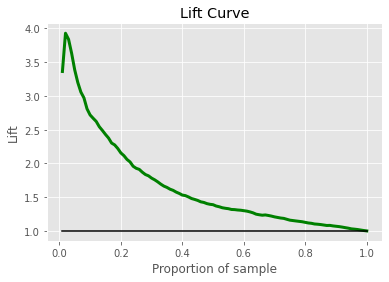

In [ ]:
plot_lift_curve(y_test, y_pr)

This is exactly what we want to see in a lift curve.  At a proportion of about 10% of the sample, we can see that we have more than 3 times more of positive labels than the average.  This is not the highest lift value one could expect but it means that our model is doing what we want it to do and is classifying both classes well.

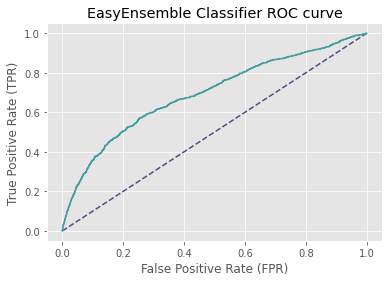

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pr)

plt.plot([0,1],[0,1], color='#495084', linestyle='--')
plt.plot(fpr,tpr, label='ltgb', color='#479D9E')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('EasyEnsemble Classifier ROC curve')
plt.show()

The area under the ROC curve is 0.70 and the area under the precision-recall curve is 0.26 for the Easy Ensemble classifier.  Let's see if stacking a few of our different models can produce better scores.

###**Stacking**

In [ ]:
stacker = VotingClassifier(estimators=[('easy', easy_tuned), ('brf', brf_tuned), ('xgb', xgb_ros_tuned)], voting='hard', weights = [1,2,1])

stacker.fit(X_train,y_train)

VotingClassifier(estimators=[('easy',
                              EasyEnsembleClassifier(n_estimators=132,
                                                     random_state=2346)),
                             ('brf',
                              BalancedRandomForestClassifier(class_weight={0: 1,
                                                                           1: 7.5},
                                                             max_depth=18,
                                                             max_features=2,
                                                             min_samples_split=3,
                                                             n_estimators=405)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=0.4,
                                            colsample_bynode=1,
                                            colsample_

In [ ]:
print(stacker.score(X_train, y_train))
print(stacker.score(X_test, y_test))

0.7148546027042045
0.702009445319011


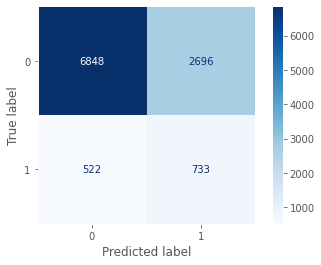

Accuracy of the Voting classifier model: 70.2009445319011 

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      9544
           1       0.21      0.58      0.31      1255

    accuracy                           0.70     10799
   macro avg       0.57      0.65      0.56     10799
weighted avg       0.85      0.70      0.75     10799



In [ ]:
stacker_predicted = stacker.predict(X_test)

plot_confusion_matrix(stacker, X_test, y_test, cmap = 'Blues')
plt.grid(False)
plt.show()

stack_acc_score = accuracy_score(y_test, stacker_predicted)

print("Accuracy of the Voting classifier model:", stack_acc_score * 100,'\n')
print(classification_report(y_test, stacker_predicted))

Not quite as good as the EasyEnsemble Classifier.

###**Neural Network**

Why would we resort to an artificial neural network?  Calibrated probabilities are naturally produced by them.  We are not predicting a realistic inherent property but a probability that an event will occur.  Neural networks are great for that.

In [ ]:
from tensorflow.keras.utils import to_categorical

#one-hot encode target column
train_y_2 = to_categorical(y_train)

#vcheck that target column has been converted
train_y_2[0:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
n_inputs = X_train.shape[1]

nn_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu', kernel_initializer= 'he_uniform' ),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_constraint=maxnorm(4)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_constraint=maxnorm(4)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_constraint=maxnorm(4)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_constraint=maxnorm(4)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_constraint=maxnorm(4)),
    Dense(8, activation='relu', kernel_constraint=maxnorm(4)),
    Dense(2, activation='sigmoid')
])

In [ ]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 13)                182       
                                                                 
 dropout_4 (Dropout)         (None, 13)                0         
                                                                 
 dense_25 (Dense)            (None, 256)               3584      
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)               

In [ ]:
nn_model.compile(optimizer='adam',loss = tf.keras.losses.CategoricalCrossentropy(), metrics=tf.keras.metrics.AUC(curve='ROC')) 

In [ ]:
weights = {0:1, 1:8}

callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc_3', patience=3)

In [ ]:
nn_model.fit(X_train, train_y_2, class_weight = weights, validation_split=0.2, batch_size=16, epochs=200, shuffle=True, callbacks = [callback], verbose=2)



Epoch 1/200
1620/1620 - 21s - loss: 1.1868 - auc_3: 0.6677 - val_loss: 0.6724 - val_auc_3: 0.6867 - 21s/epoch - 13ms/step
Epoch 2/200
1620/1620 - 12s - loss: 1.1874 - auc_3: 0.6799 - val_loss: 0.6398 - val_auc_3: 0.7593 - 12s/epoch - 7ms/step
Epoch 3/200
1620/1620 - 5s - loss: 1.1812 - auc_3: 0.6811 - val_loss: 0.6545 - val_auc_3: 0.6788 - 5s/epoch - 3ms/step
Epoch 4/200
1620/1620 - 5s - loss: 1.1768 - auc_3: 0.6857 - val_loss: 0.7077 - val_auc_3: 0.6002 - 5s/epoch - 3ms/step
Epoch 5/200
1620/1620 - 5s - loss: 1.1761 - auc_3: 0.6830 - val_loss: 0.6347 - val_auc_3: 0.7615 - 5s/epoch - 3ms/step
Epoch 6/200
1620/1620 - 5s - loss: 1.1757 - auc_3: 0.6910 - val_loss: 0.6460 - val_auc_3: 0.7299 - 5s/epoch - 3ms/step
Epoch 7/200
1620/1620 - 5s - loss: 1.1744 - auc_3: 0.7075 - val_loss: 0.6589 - val_auc_3: 0.7391 - 5s/epoch - 3ms/step


In [ ]:
nn_predictions = nn_model.predict(X_test, batch_size=25, verbose=2)

432/432 - 1s - 594ms/epoch - 1ms/step


In [ ]:
nn_conversion_predictions = np.argmax(nn_model.predict(X_test), axis=1)

In [ ]:
nn_acc_score = accuracy_score(y_test, nn_conversion_predictions)

print("Accuracy of the Neural Network:", nn_acc_score * 100,'\n')
print(classification_report(y_test, nn_conversion_predictions))

Accuracy of the Neural Network: 71.30289841652004 

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9544
           1       0.21      0.53      0.30      1255

    accuracy                           0.71     10799
   macro avg       0.57      0.63      0.56     10799
weighted avg       0.84      0.71      0.76     10799



##**Conclusion**

The target for this dataset is whether a client subscribed to a term deposit.  This target contains severly imbalanced classes (yes or no).  An artificial neural network produced the highest area under the ROC curve for this project.  This is probably due to a neural network's ability to model non-linear data and because it naturally calibrates probabilities. More importantly, the lift curve constructed after the pipeline including One-sided selection sampling, a MinMax scaler and The EasyEnsemble classifier from imblearn indicated that the classifier was working as expected.  A hyperparameter tuning function was created to capture the best parameters for any model being implemented. The geometric mean was used as a scoring method to compare models as this metric takes sensitivity and specificity into account.  Cost-sensitive random forest and extra trees classifier was used initially based on results from the Lazy Classifier.  A balanced random forest model was subsequently attempted as well as SMOTE but the expected results did not materialize and they were not very good classifiers of the minority class (customers who will purchase a term deposit). The Easy Ensemble Classifier had the best recall results as it predicted more customers who did subscribe to a term deposit and also performed reasonably well on the majority class as well. 

Customers who have a housing loan, married and have an average yearly balance of over $1074 were most likely to purchase a term deposit. Customers who are not married and were not contacted at least 4 times in this campaign probably would not purchase a term-deposit. Customers who have low average yearly balances were not likely to purchase and customers who are younger than 60 years of age in this group were also not likely to purchase a term deposit.

Three functions were set up to determine which method of undersampling or oversampling should be utilized based on any given model. I elected the One Sided Selection undersampling method because it only removed 1644 rows and performed as well as random oversampling which can lead to overfitting for the Easy Ensemble Classifier. An artificial neural network still outperformed the Easy Ensemble Classifier even after stacking this classifier with XGBoost and a balanced random forest.

Feature selection was performed during exploratory data analysis where the month feature did not have an even distribution of values.  The majority of observations were in the month of May and none were observed in September.  Additionally, contact was removed from the data set as there were a large number of unknown values and there was a very small distribution of customers who were contacted on their telephones as opposed to cellular.  I did not see how this would lend any insight especially since there were fewer customers that purchased a term deposit in the telephone class. The call duration was also removed as this feature introduces bias into the model because most of the time on these calls is used for setting up the purchase and this is an implied result in this case. I utilized a combination of one-hot and target encoding for three categorical variables. 

The XGBoost model has an embedded feature importance function and the results were a little surprising.  Customers that have defaulted has little importance on the model in terms of subscribing to a term deposit.  However, the average yearly balance of the customer was considered to be the most important feature in this model. Usually, with most banking business problems, the balance of an account is a usually of great importance to a model.  The age of the customer and how many times the customer was contacted during this campaign also had large importance as well.  Lastly, the job genre of the customer has importance as well. 
     